In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
import itertools

In [23]:
#qiskit import statements

from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import random_statevector, Statevector
import qiskit.quantum_info as qi
from qiskit.circuit import Parameter #allows us to have parameterized gates
from qiskit.extensions import UnitaryGate
from qiskit.circuit.library import MCMT

# Use Aer's qasm_simulator
simulator = AerSimulator()

In [59]:
oracle = QuantumCircuit(5, 4)

oracle.x([2, 3])
oracle.mcx([0, 1, 2, 3], 4)
oracle.x([2, 3])

oracle.draw()

q_0: ───────■───────
            │       
q_1: ───────■───────
     ┌───┐  │  ┌───┐
q_2: ┤ X ├──■──┤ X ├
     ├───┤  │  ├───┤
q_3: ┤ X ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_4: ─────┤ X ├─────
          └───┘     
c: 4/═══════════════

In [53]:
grover = QuantumCircuit(5, 4)

grover.h([0, 1, 2, 3])
grover.barrier(range(5))
grover.x([0, 1, 2, 3])
grover.h([3])
grover.mcx([0, 1, 2], 3)
grover.h([3])
grover.x([0, 1, 2, 3])
grover.barrier(range(5))
grover.h([0, 1, 2, 3])

grover.draw()

┌───┐ ░ ┌───┐          ┌───┐      ░ ┌───┐
q_0: ┤ H ├─░─┤ X ├───────■──┤ X ├──────░─┤ H ├
     ├───┤ ░ ├───┤       │  ├───┤      ░ ├───┤
q_1: ┤ H ├─░─┤ X ├───────■──┤ X ├──────░─┤ H ├
     ├───┤ ░ ├───┤       │  ├───┤      ░ ├───┤
q_2: ┤ H ├─░─┤ X ├───────■──┤ X ├──────░─┤ H ├
     ├───┤ ░ ├───┤┌───┐┌─┴─┐├───┤┌───┐ ░ ├───┤
q_3: ┤ H ├─░─┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├─░─┤ H ├
     └───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘
q_4: ──────░───────────────────────────░──────
           ░                           ░      
c: 4/═════════════════════════════════════════

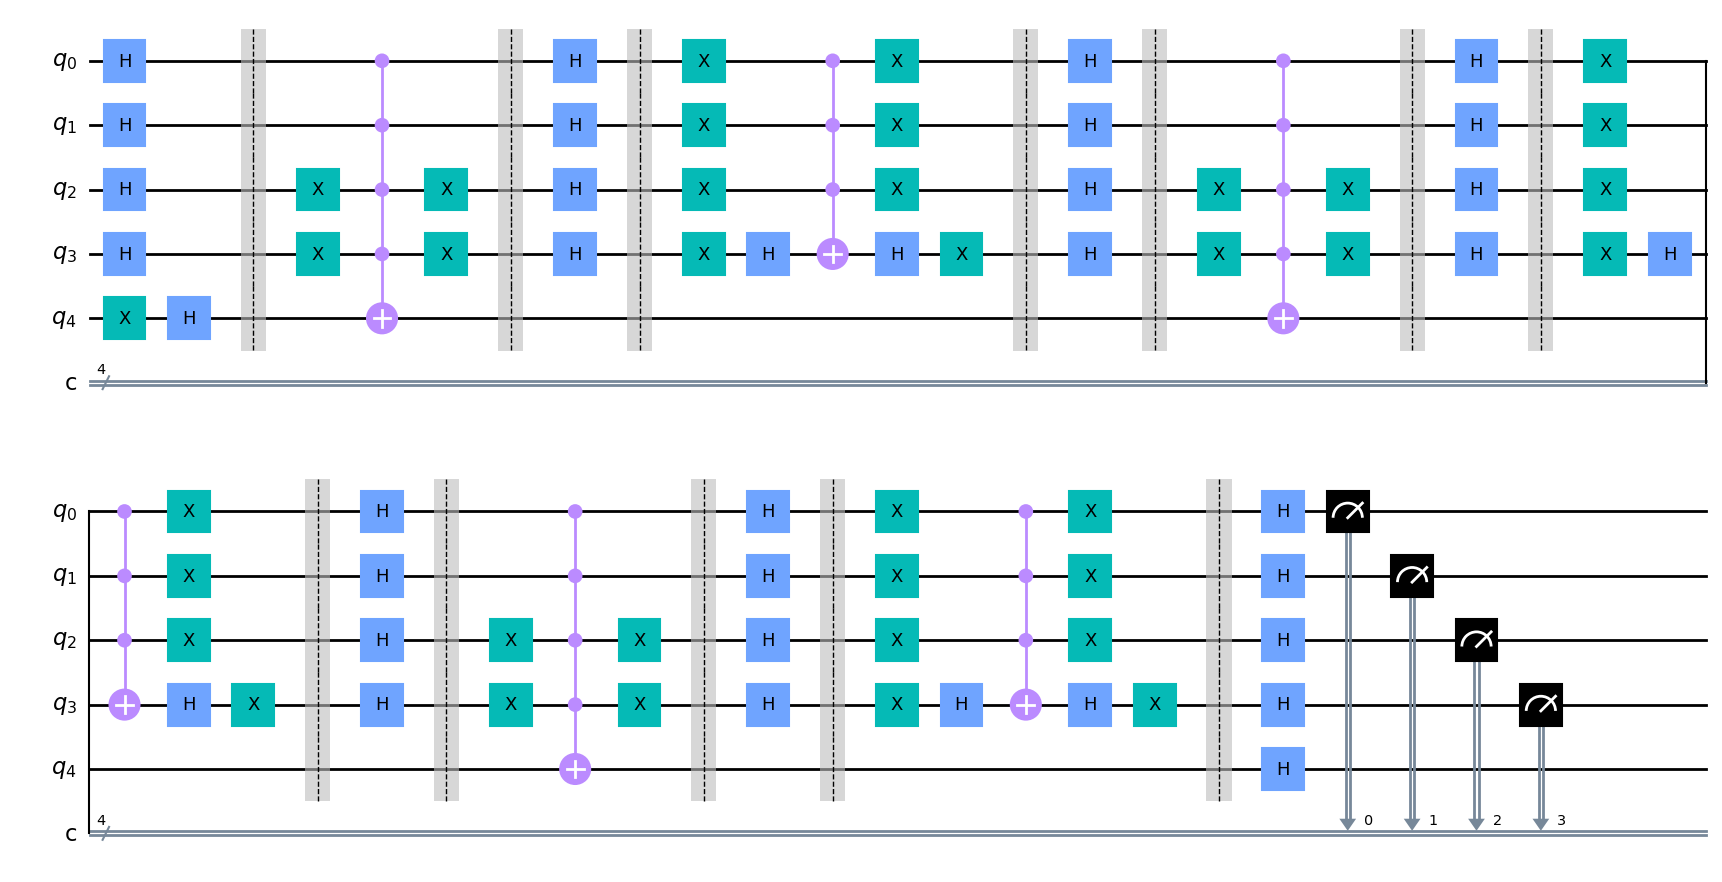

In [70]:
fullCircuit = QuantumCircuit(5, 4)
fullCircuit.x([4])
fullCircuit.h(range(5))
fullCircuit.barrier(range(5))
fullCircuit = fullCircuit.compose(oracle)
fullCircuit.barrier(range(5))
fullCircuit = fullCircuit.compose(grover)
fullCircuit.barrier(range(5))
fullCircuit = fullCircuit.compose(oracle)
fullCircuit.barrier(range(5))
fullCircuit = fullCircuit.compose(grover)
fullCircuit.barrier(range(5))
fullCircuit = fullCircuit.compose(oracle)
fullCircuit.barrier(range(5))
fullCircuit = fullCircuit.compose(grover)


#potential future repetitions
fullCircuit.h(4)
fullCircuit.measure(range(4), range(4))

fullCircuit.draw('mpl')

In [71]:
compiled = transpile(fullCircuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled, shots=1024)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts()
print(counts)

{'1011': 1, '0111': 1, '1001': 1, '1010': 2, '0101': 3, '0000': 2, '0010': 3, '0100': 4, '1100': 1, '1110': 2, '1000': 2, '1111': 3, '1101': 4, '0011': 987, '0001': 4, '0110': 4}
